In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import nltk

print("All libraries are installed and working correctly!")


All libraries are installed and working correctly!


In [3]:
import pandas as pd

# Load the dataset
data = pd.read_csv('IMDB Dataset.csv')

# Display the first few rows to understand the structure
print(data.head())


                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [5]:
# Check the basic information of the dataset
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [7]:
# Check for missing values
print(data.isnull().sum())


review       0
sentiment    0
dtype: int64


sentiment
positive    25000
negative    25000
Name: count, dtype: int64


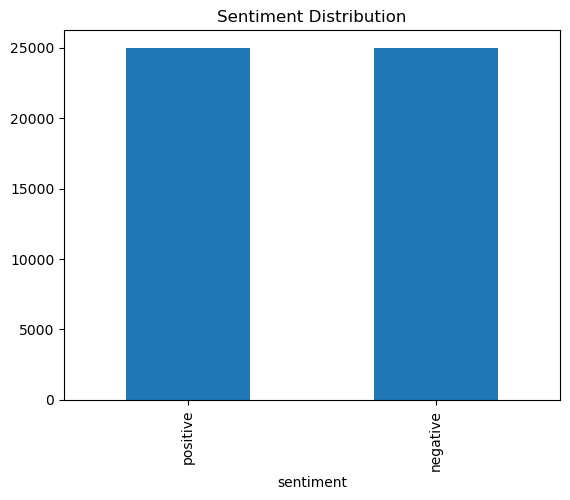

In [9]:
# Check the distribution of sentiment labels
print(data['sentiment'].value_counts())

# Plot the distribution
data['sentiment'].value_counts().plot(kind='bar', title='Sentiment Distribution')
plt.show()


In [11]:
import re

# Function to clean the text
def clean_text(text):
    text = re.sub(r'\s+', ' ', text)  # Remove extra spaces
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Remove special characters and numbers
    text = text.lower()  # Convert to lowercase
    return text

# Apply the cleaning function to the review column
data['cleaned_review'] = data['review'].apply(clean_text)

# Display the first few cleaned reviews
print(data[['review', 'cleaned_review']].head())


                                              review  \
0  One of the other reviewers has mentioned that ...   
1  A wonderful little production. <br /><br />The...   
2  I thought this was a wonderful way to spend ti...   
3  Basically there's a family where a little boy ...   
4  Petter Mattei's "Love in the Time of Money" is...   

                                      cleaned_review  
0  one of the other reviewers has mentioned that ...  
1  a wonderful little production   br    br   the...  
2  i thought this was a wonderful way to spend ti...  
3  basically there s a family where a little boy ...  
4  petter mattei s  love in the time of money  is...  


In [13]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/repudiarchit/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
from nltk.tokenize import word_tokenize

# Define the stopwords
stop_words = set(stopwords.words('english'))

# Function to tokenize and remove stopwords
def tokenize_and_remove_stopwords(text):
    tokens = word_tokenize(text)  # Tokenize the text
    filtered_tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return ' '.join(filtered_tokens)

# Apply the function to the cleaned_review column
data['processed_review'] = data['cleaned_review'].apply(tokenize_and_remove_stopwords)

# Display the first few processed reviews
print(data[['cleaned_review', 'processed_review']].head())


                                      cleaned_review  \
0  one of the other reviewers has mentioned that ...   
1  a wonderful little production   br    br   the...   
2  i thought this was a wonderful way to spend ti...   
3  basically there s a family where a little boy ...   
4  petter mattei s  love in the time of money  is...   

                                    processed_review  
0  one reviewers mentioned watching oz episode ho...  
1  wonderful little production br br filming tech...  
2  thought wonderful way spend time hot summer we...  
3  basically family little boy jake thinks zombie...  
4  petter mattei love time money visually stunnin...  


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer(max_features=5000)  # You can adjust the max_features parameter

# Fit and transform the processed reviews
X = tfidf.fit_transform(data['processed_review']).toarray()

# Display the shape of the TF-IDF matrix
print("TF-IDF matrix shape:", X.shape)


TF-IDF matrix shape: (50000, 5000)


In [19]:
from sklearn.preprocessing import LabelEncoder

# Initialize the Label Encoder
le = LabelEncoder()

# Convert the sentiment labels into binary format
y = le.fit_transform(data['sentiment'])

# Display the first few labels
print("Labels:", y[:10])


Labels: [1 1 1 0 1 1 1 0 0 1]


In [21]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (40000, 5000)
Testing set size: (10000, 5000)


In [23]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)


LogisticRegression()

In [25]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)

# Display the classification report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy on test set: 0.8923
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89      4961
           1       0.88      0.91      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [34]:
import joblib

# Save the model
joblib.dump(model, 'sentiment_model.pkl')

# Save the vectorizer
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']